# IEEE Data - Statistical Analysis

Welcome to our sats notebook! We're going to be looking at some data from the IEEE brain bank. The data was taken over 48 trials (16 weeks) with each subject taking part in a baseline pre-test, then multiple types of training tests, and a benchmark post-test after the training trials had been completed. The pre and post tests included the LSAT, as well as a figure series. The training tests included 3 visiospatial tasks and 3 change detection tasks.

<img src='DataBreakdown.jpg'>

In [41]:
# just importing the modules we'll need
%matplotlib inline
import pandas as pd
import os
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import scipy.stats
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes
    
# let's import our data as a dataframe for easy statistical analysis (td for testing data)
td = pd.read_csv(os.path.join(os.getcwd(),'PrePostData/TestingDataALL1.csv'))

Let's start just by taking a look at the data to see what we're dealing with

In [3]:
td.head()

,Subject,Age,Gender,PreFigureSeries,PreLSATReasoning,PreLetterComp_Accuracy,PreLetterComp_AttemptedTrials,PreLetterComp_CorrectTrials,PreLetterComp_AvgRT,PreLetterComp_AvgCorrectTrialRT,PreDSST_Attempted,PreDSST_Correct,PreDSST_Accuracy,PostFigureSeries,PostLSATReasoning,PrePatternComp_Accuracy,PrePatternComp_AttemptedTrials,PrePatternComp_CorrectTrials,PrePatternComp_AvgRT,PrePatternComp_AvgCorrectTrialRT
0,10,21,1,24,13,0.869565,23.0,20.0,2465.565217,2281.150000,82,82,1.0,25,6,0.976744,43,42,1248.720930,1239.857143
1,11,20,2,20,15,0.962963,27.0,26.0,2074.962963,2062.730769,113,113,1.0,26,13,1.000000,30,30,1718.400000,1718.400000
2,12,20,1,15,11,1.000000,21.0,21.0,2679.047619,2679.047619,76,76,1.0,7,10,0.900000,30,27,1839.200000,1858.629630
3,13,21,2,18,10,0.958333,24.0,23.0,2348.083333,2417.652174,124,124,1.0,19,11,0.936170,47,44,1117.765957,1131.750000
4,14,21,1,20,14,1.000000,24.0,24.0,2239.333333,2239.333333,106,106,1.0,15,13,0.933333,45,42,1197.733333,1200.238095


Gross, looks like it's arbitrarily sorted. Let's just fix that really quick.

In [4]:
# sort by Subject
td.set_index('Subject')
td.sort_values(['Subject']).head()

,Subject,Age,Gender,PreFigureSeries,PreLSATReasoning,PreLetterComp_Accuracy,PreLetterComp_AttemptedTrials,PreLetterComp_CorrectTrials,PreLetterComp_AvgRT,PreLetterComp_AvgCorrectTrialRT,PreDSST_Attempted,PreDSST_Correct,PreDSST_Accuracy,PostFigureSeries,PostLSATReasoning,PrePatternComp_Accuracy,PrePatternComp_AttemptedTrials,PrePatternComp_CorrectTrials,PrePatternComp_AvgRT,PrePatternComp_AvgCorrectTrialRT
10,1,34,1,15,9,1.000000,26.0,26.0,2176.846154,2176.846154,87,87,1.000000,17,13,0.970588,34,33,1583.970588,1566.333333
17,2,30,1,21,13,1.000000,24.0,24.0,2232.958333,2232.958333,86,85,0.988372,28,14,1.000000,32,32,1723.062500,1723.062500
18,3,22,2,23,19,NaN,NaN,NaN,NaN,NaN,90,89,0.988889,30,19,0.962264,53,51,1000.452830,1011.411765
19,4,19,1,23,14,0.888889,27.0,24.0,2099.518519,2091.458333,91,91,1.000000,23,10,0.942857,35,33,1539.685714,1522.969697
20,5,20,1,15,16,0.862069,29.0,25.0,1944.965517,1894.080000,99,98,0.989899,19,11,0.935484,31,29,1785.548387,1755.103448


That's better. So it looks like we have two different pre/post tests to compare. The LSATReasoning, and the FigureSeries
***


## Analysis - Part 1

Let's plot both just to see what we're working with

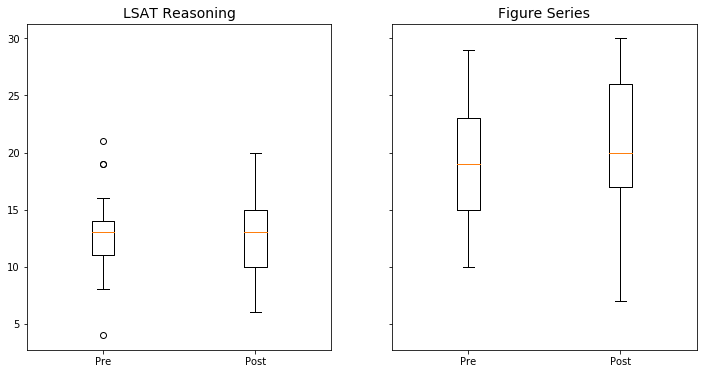

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
axes[0].boxplot([td['PreLSATReasoning'], td['PostLSATReasoning']], labels=["Pre", "Post"])
axes[0].set_title('LSAT Reasoning', fontsize=14)

axes[1].boxplot([td['PreFigureSeries'], td['PostFigureSeries']], labels=["Pre", "Post"])
axes[1].set_title('Figure Series', fontsize=14)
plt.show()

Hmm, doesn't look like there's much variation. Let's run some t-tests, though, just to be sure.
***
Remember, a t-test is used to compare the means of two different samples in relation to the variations in the data.

> our null hypothesis is that the pre and post series are not statistically different, which would result in a p-value > 0.05

In [39]:
scipy.stats.ttest_ind(td['PostFigureSeries'], td['PreFigureSeries']).pvalue

0.45076787849712463

In [40]:
scipy.stats.ttest_ind(td['PostLSATReasoning'], td['PreLSATReasoning']).pvalue

0.93779903968594625

Our p-values are 0.45 and 0.937. Not very promising.
<Enter> 
<dl>
  <dt>Conclusion:</dt>
  <dd>We cannot reject the null hypothesis</dd>
</dl>
***

## Analysis - Part 2

Let's do something else. Instead of looking at the pre/post tests, let's look at the training tests.
> We'll try to plot each subject's difficulty level over the trials to see if we can describe the trend

In [86]:
# import training data file names
path =r'C:\Users\howen\Documents\GitHub\neurotechIEEE\Subjects\ChangeDetection'
filenames = glob.glob(path + "/*.csv")

# make a dataframe for each file
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame -- All Subjects' change detection data
allsubjects_cd = pd.concat(dfs, ignore_index=True)

Let's check out what we have.

In [87]:
allsubjects_cd.head()

,Subject,Session,GamesPlayed,Version,AvgDifficulty,StartDifficulty,EndDifficulty,MinDifficulty,MaxDifficulty,AvgRT,AvgAccuracy
0,1,1,16.0,1,6.125000,3.0,8.0,3.0,8.0,1055.000000,84.250000
1,1,2,10.0,1,7.700000,8.0,9.0,7.0,9.0,1252.500000,79.500000
2,1,3,11.0,1,10.727273,9.0,12.0,9.0,12.0,1219.090909,81.818182
3,1,4,10.0,1,13.000000,12.0,14.0,12.0,14.0,1358.600000,76.100000
4,1,5,11.0,1,16.363636,14.0,20.0,14.0,20.0,1399.454545,77.272727


Awesome. The dataframe holds each subject's 48 trials and their ratings for each one. Now let's plot each subjects' difficulty over time.

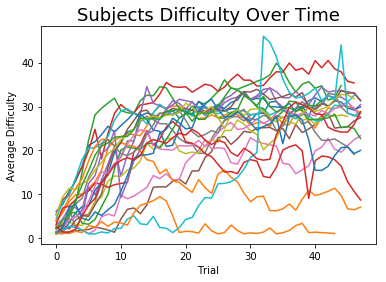

In [131]:
fig = figure()
ax = axes()

for sub in range(1,25):
    subject = allsubjects_cd.loc[allsubjects_cd['Subject'] == sub]
    subject_game1 = subject.loc[subject['Version'] == 1]
    plt.plot(range(0,len(subject_game1)), subject_game1["AvgDifficulty"])
plt.xlabel('Trial')
plt.ylabel('Average Difficulty')
plt.title('Subjects Difficulty Over Time', fontsize=18)
plt.show()

Okay, that looks pretty busy, but overall there seems to be a trend. Let's see if we can describe that mathematically.